In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


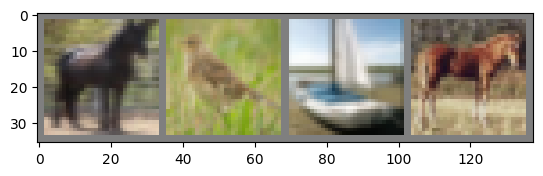

horse bird  ship  horse


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### use Cross-Entropy loss and assign to criterion variable

In [5]:
import torch.optim as optim

### BEGIN SOLUTION

criterion = nn.CrossEntropyLoss()

### END SOLUTION

In [6]:
#### BEGIN HIDDEN TESTS

# Test case 1: Check that `criterion` is an instance of `nn.CrossEntropyLoss`
assert isinstance(criterion, nn.CrossEntropyLoss), "Criterion should be an instance of nn.CrossEntropyLoss"

#### END HIDDEN TESTS

#### Create an object 'optimizer' for momentum based SGD optimzer 
#### Consider learning rate as 0.001 and momentum as 0.9

In [7]:
### BEGIN SOLUTION

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### END SOLUTION

In [8]:
#### BEGIN HIDDEN TESTS

# Test case 2: Check that `optimizer` is an instance of `optim.SGD`
assert isinstance(optimizer, optim.SGD), "Optimizer should be an instance of optim.SGD"

# Test case 3: Check that the learning rate of the optimizer is correctly set
assert optimizer.defaults['lr'] == 0.001, "Learning rate should be set to 0.001"

# Test case 4: Check that the momentum of the optimizer is correctly set
assert optimizer.defaults['momentum'] == 0.9, "Momentum should be set to 0.9"

#### END HIDDEN TESTS

In [9]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[NVSHARE][WARN]: Couldn't open file /var/run/secrets/kubernetes.io/serviceaccount/namespace to read Pod namespace
[NVSHARE][INFO]: Successfully initialized nvshare GPU
[NVSHARE][INFO]: Client ID = a00eb5d89abbe1b1


[1,  2000] loss: 2.241
[1,  4000] loss: 1.886
[1,  6000] loss: 1.693
[1,  8000] loss: 1.586
[1, 10000] loss: 1.528
[1, 12000] loss: 1.470
[2, 10000] loss: 1.309
[2, 12000] loss: 1.281
Finished Training


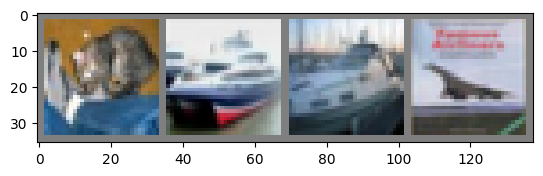

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))